In [4]:
import pandas as pd

In [5]:
data=pd.read_csv('/kaggle/input/tokyo-olympics-2020-tweets/tokyo_2020_tweets.csv')

/tmp/ipykernel_33/476521589.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/tokyo-olympics-2020-tweets/tokyo_2020_tweets.csv')


In [6]:
data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [7]:
data.drop(['source'],axis=1)

id                        user_name  \
0       1418888645105356803               Abhishek Srivastav   
1       1418888377680678918         Saikhom Mirabai ChannuüáÆüá≥   
2       1418888260886073345                     Big Breaking   
3       1418888172864299008  International Hockey Federation   
4       1418886894478270464                     Cameron Hart   
...                     ...                              ...   
297006  1419947001102405633                     Belgian Cats   
297007  1419946996895346689                        IOC MEDIA   
297008  1419946993909047299                     Devin Heroux   
297009  1419946992948576256            ‚ìÇÔ∏èùêöùê¨ùêö üçä ùêåùê´.ùêÇùê°ùê¢ùê•ùêùùê´ùêûùêß üåè   
297010  1419946985214431232            Oigetit Breaking News   

                user_location  \
0                Udupi, India   
1              Manipur, India   
2                      Global   
3                    Lausanne   
4                   Australia   
...                       ...   
297006               Brussels   
297007  Lausanne. Switzerland   
297008       Toronto, Ontario   
297009                     Êù±‰∫¨   
297010      San Francisco, CA   

                                         user_description  \
0                    Trying to be mediocre in many things   
1           Indian weightlifter 48 kg category. ChampionüèÜ   
2       All breaking news related to Financial Market....   
3       Official International Hockey Federation Twitt...   
4                                 Football & Tennis Coach   
...                                                   ...   
297006     The Belgian National Team - Women's basketball   
297007  Keep updated with all the latest news from the...   
297008  CBC News/Olympics Reporter. Based in Toronto. ...   
297009  üóºùëáùëúùëòùë¶ùëú ùêΩùê¥ùëÉùê¥ùëÅ üáØüáµ ‚úÇÔ∏é Ë°®ÂèÇÈÅì ‚≠êÔ∏é ÂéüÂÆø ‚úÇÔ∏é ùêªùëéùëñùëü ùë†ùë°ùë¶ùëôùëñùë†ùë° ‚úÇ...   
297010  Powered by AI fake news filtering technology, ...   

               user_created user_followers user_friends user_favourites  \
0       2021-02-01 06:33:51           45.0         39.0           293.0   
1       2018-04-07 10:10:22         5235.0          5.0          2969.0   
2       2021-05-29 08:51:25         3646.0          3.0             5.0   
3       2010-10-20 10:45:59       103975.0       2724.0         36554.0   
4       2020-10-31 08:46:17            6.0         37.0            31.0   
...                     ...            ...          ...             ...   
297006  2010-05-11 10:28:27           5296          161             973   
297007  2011-01-05 10:00:39         147657          712             624   
297008  2009-03-24 22:53:21          44209         2317          153144   
297009  2015-12-31 02:13:03            149          245           12208   
297010  2020-06-10 01:19:55            343          273            1360   

       user_verified                 date  \
0              False  2021-07-24 10:59:49   
1              False  2021-07-24 10:58:45   
2              False  2021-07-24 10:58:17   
3               True  2021-07-24 10:57:56   
4              False  2021-07-24 10:52:51   
...              ...                  ...   
297006         False  2021-07-27 09:05:21   
297007          True  2021-07-27 09:05:20   
297008          True  2021-07-27 09:05:19   
297009         False  2021-07-27 09:05:19   
297010         False  2021-07-27 09:05:17   

                                                     text  \
0                         Let the party begin\n#Tokyo2020   
1       Congratulations #Tokyo2020 https://t.co/8OFKMs...   
2       Big Breaking Now \n\nTokyo Olympic Update \n\n...   
3       Q4: üá¨üáß3-1üáøüá¶\n\nGreat Britain finally find a wa...   
4       All I can think of every time I watch the ring...   
...                                                   ...   
297006  It's a close contest in our first Olympic game...   
297007  10 athletes from t

In [8]:
data['text']

0                           Let the party begin\n#Tokyo2020
1         Congratulations #Tokyo2020 https://t.co/8OFKMs...
2         Big Breaking Now \n\nTokyo Olympic Update \n\n...
3         Q4: üá¨üáß3-1üáøüá¶\n\nGreat Britain finally find a wa...
4         All I can think of every time I watch the ring...
                                ...                        
297006    It's a close contest in our first Olympic game...
297007    10 athletes from the IOC @RefugeesOlympic star...
297008    SNACK TIME! \n\nHow could I say no to ‚Äútwo sof...
297009    .\n.\n.\nüèÑ‚Äç‚ôÇÔ∏è ùêäùêöùêßùê®ùêö ùêàùê†ùêöùê´ùêöùê¨ùê°ùê¢ üáØüáµ\n.\n.\nü•àùêÇùê®ùêßùê†ùê´ùêö...
297010    #Breaking - It brings Tokyo‚Äôs total to more th...
Name: text, Length: 297011, dtype: object

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import tqdm
import sys
# Download necessary NLTK resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_tweet(tweet):
    try:
        # Remove URLs
        tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)

        # Remove special characters and numbers (keeping only alphanumeric characters and spaces)
        tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)

        # Tokenization with regular expression-based tokenizer
        words = re.findall(r'\b\w+\b', tweet.lower())

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]

        # Stemming with Porter stemmer
        stemmer = LancasterStemmer()
        words = [stemmer.stem(word) for word in words]

        # Join the words back into a string
        processed_tweet = ' '.join(words)

        return processed_tweet
    except:
        return ""  # Ignore errors and return an empty string for the current tweet

# Example usage for each tweet:


processed_tweets=[]
for  a in tqdm.tqdm(data['text'],file=sys.stdout,colour="blue"):
    try:
        processed_tweets.append(preprocess_tweet(a))
    except:
        continue

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 297011/297011 [01:43<00:00, 2883.15it/s]  


In [10]:
processed_tweets

['let party begin tokyo',
 'congrat tokyo',
 'big break tokyo olymp upd jap first gold takato naohis gold men kg judo c',
 'q gre britain fin find way way pieters jack wal find net via stick sou',
 'think every tim watch ring ev tokyo artisticgymnast olymp olympicgam',
 'tokyo olymp mirabaichanu weightlift wom empow real vs',
 'cant help che band goal gam zamb goal diff wel don get p',
 'inquirerdotnet ftjochoainq caloy yulo howev good six ring prelimin',
 'q green card canada captain scot tup follow liv scorecard tokyo canvg',
 'hearty congrat ind railway play saikhom miraba chanu win first med ind',
 'gre first round ring labapilipina teamphilippin tokyo olymp cedrielzx tokyoolymp',
 'gymnast tokyo',
 'morn everyon caffein check lorilindsey lrom tokyo tokyoolymp',
 'year hardwork com end officialvkyadav vikaskr got def sqm okazaw first round',
 'tokyo ten win rememb nagalsumit last ind qual tokyo olymp',
 'proud uhh miraba chanu silverm mirabaichanu weightlift tokyo tokyoolymp teamin

In [11]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500)

# Fit and transform the preprocessed tweets
tfidf_matrix = vectorizer.fit_transform(processed_tweets)

# Print the feature names (words) found in the corpus
print("Feature names (words):", vectorizer.get_feature_names_out())

# Print the TF-IDF matrix (sparse representation)
print("TF-IDF Matrix:\n", tfidf_matrix)

Feature names (words): ['absolv' 'achiev' 'act' 'ad' 'adam' 'adam peaty' 'adv' 'afric' 'ahead'
 'air' 'already' 'also' 'alway' 'am' 'amaz' 'amp' 'anoth' 'anyon'
 'archery' 'argentin' 'ariarn' 'ariarn titm' 'artisticgymnast' 'athlet'
 'au' 'aussy' 'aust' 'austral' 'away' 'back' 'backstrok' 'bad' 'badminton'
 'badminton tokyo' 'bal' 'basketbal' 'basketbal tokyo' 'batr'
 'bbcolympics' 'beat' 'beauty' 'becom' 'begin' 'best' 'bet' 'big' 'bik'
 'bil' 'bit' 'boom' 'box' 'boy' 'bra' 'brazil' 'break' 'breaststrok'
 'bril' 'bring' 'britain' 'bronz' 'bronz med' 'buy' 'cal' 'campaign'
 'canad' 'cant' 'celebr' 'ceremony' 'champ' 'channel' 'chant' 'chanu'
 'che' 'check' 'cheerind' 'cheerind tokyo' 'chin' 'chines' 'clos' 'coach'
 'com' 'comeback' 'compet' 'competit' 'congr' 'congrat' 'congrat hidilyn'
 'congrat mirabaichanu' 'continu' 'could' 'country' 'cov' 'covid' 'cur'
 'cyc' 'cyclingroad' 'dai' 'daley' 'day' 'day tokyo' 'debut' 'decid' 'def'
 'defend' 'deserv' 'diaz' 'did' 'didnt' 'diff' 'disappo

In [12]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling

from sklearn.decomposition import LatentDirichletAllocation
num_topics = 5  # Specify the number of topics to identify
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topics = lda_model.fit_transform(tfidf_matrix)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

Topic 1: tokyo, olymp, gam, watch, sport, good, lik, play, get, hockey
Topic 2: tokyo, gold, med, olymp, gold med, first, hidilyn, win, swim, diaz
Topic 3: tokyo, mirabaichanu, congrat, win, proud, ind, ten, olymp, round, badminton
Topic 4: tokyo, olymp, olympicgam, tokyoolymp, olymp tokyo, tokyo olymp, skateboard, go, tokyo tokyoolymp, volleybal
Topic 5: tokyo, us, olymp, basketbal, fin, team, wel, swim, shoot, th


In [13]:
topic_labels = [topic.argmax() for topic in topics]

In [17]:
data = {'Tweet': processed_tweets,'Topic': topic_labels}

In [18]:
df = pd.DataFrame(data)

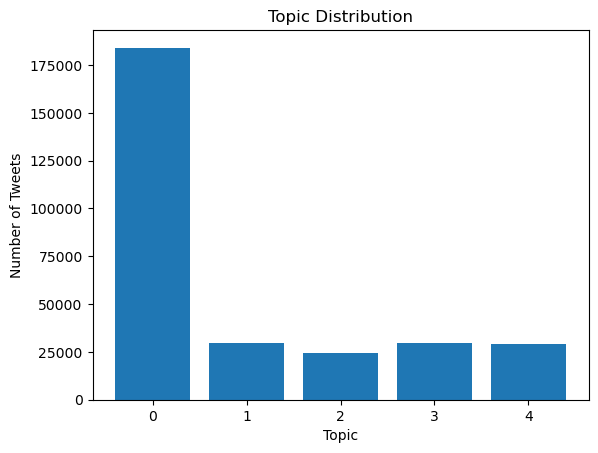

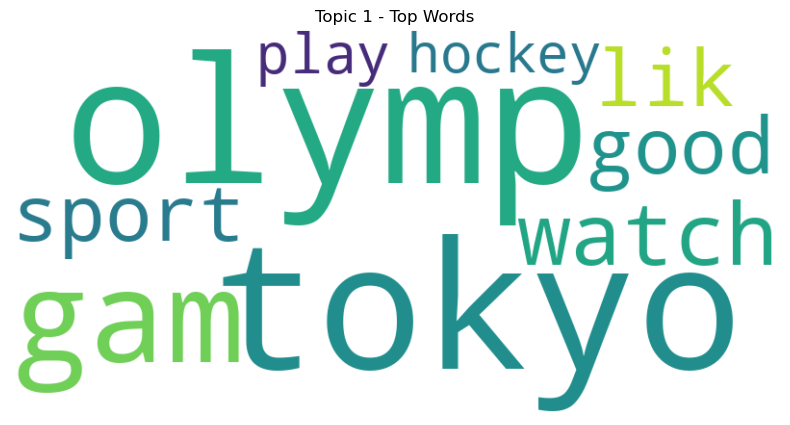

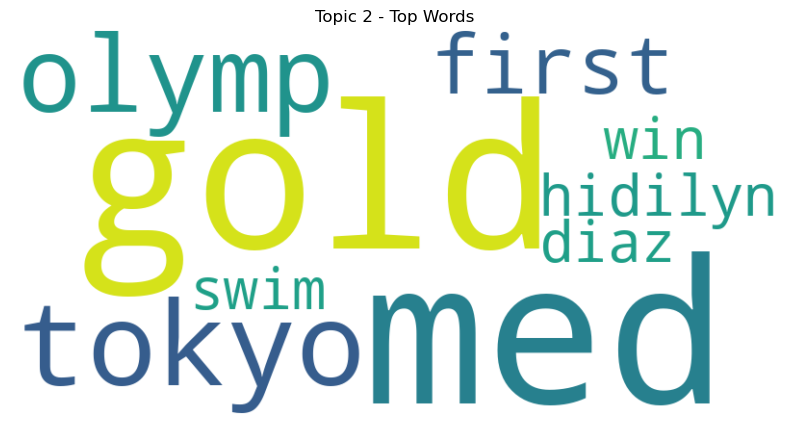

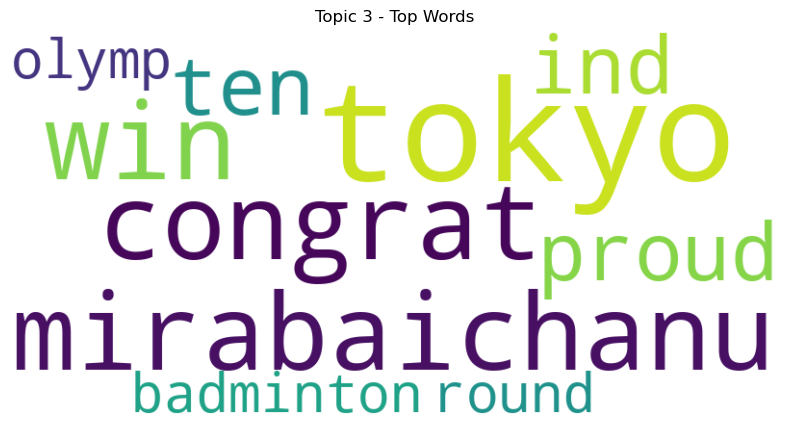

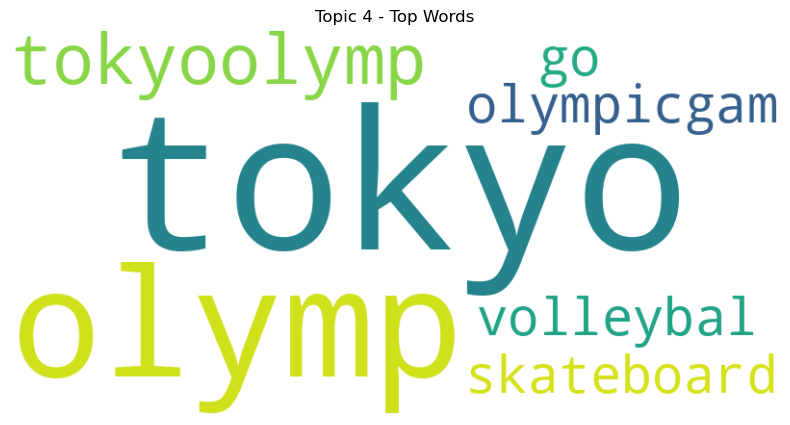

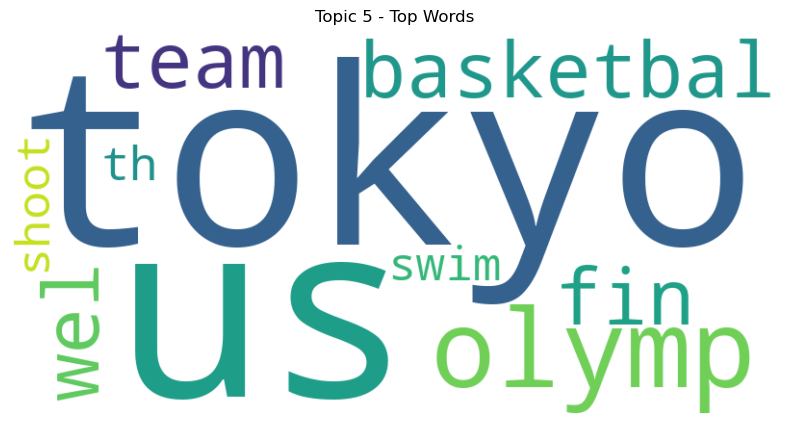

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Topic Distribution Bar Chart
topic_counts = df['Topic'].value_counts()
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.title('Topic Distribution')
plt.show()

# Word Clouds for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_indices]

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_idx+1} - Top Words")
    plt.show()


In [20]:
!pip install vaderSentiment


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.0/126.0 kB 5.8 MB/s eta 0:00:00


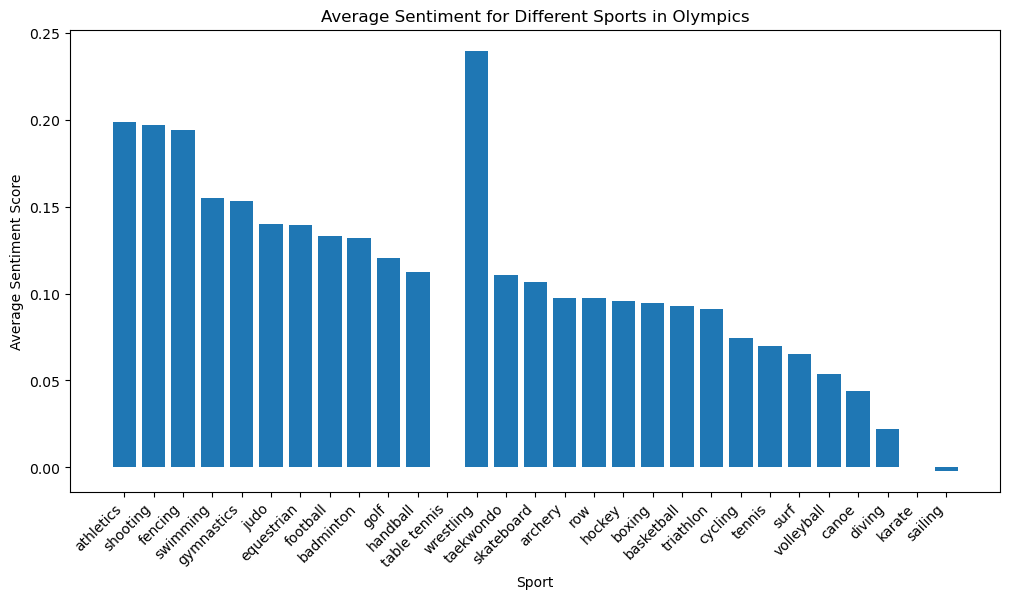

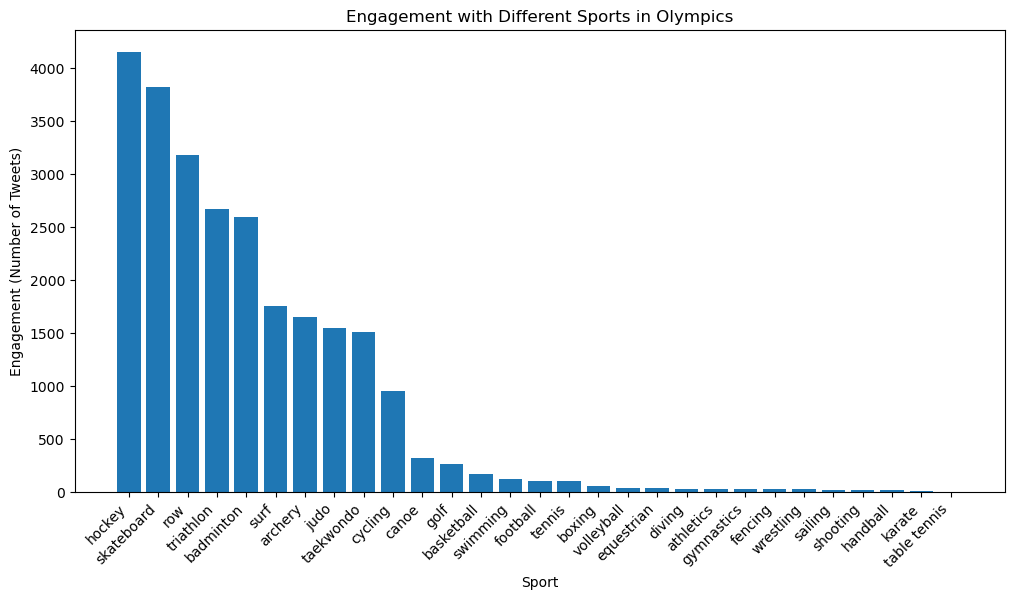

Correlation between Average Sentiment and Engagement: 0.704677363924112


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sports_keywords = ['athletics', 'swimming', 'gymnastics', 'basketball', 'football',
                   'volleyball', 'tennis', 'cycling', 'diving', 'archery', 'badminton',
                   'boxing', 'canoe', 'equestrian', 'fencing', 'golf', 'handball',
                   'hockey', 'judo', 'karate', 'row', 'sailing', 'shooting', 'skateboard',
                   'surf', 'table tennis', 'taekwondo', 'triathlon', 'wrestling']

# Perform sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Tweet'].apply(lambda tweet: analyzer.polarity_scores(tweet)['compound'])

# Compare average sentiment scores and engagement levels for each sport
avg_sentiment_by_sport = {}
engagement_by_sport = {}
for sport in sports_keywords:
    sport_tweets = df[df['Tweet'].str.contains(sport, case=False)]
    avg_sentiment_by_sport[sport] = sport_tweets['Sentiment'].mean()
    engagement_by_sport[sport] = sport_tweets.shape[0]

# Sort the sports based on their average sentiment scores
sorted_avg_sentiment = sorted(avg_sentiment_by_sport.items(), key=lambda x: x[1], reverse=True)
sorted_sports, sorted_avg_sentiment = zip(*sorted_avg_sentiment)

# Create a bar chart to visualize the average sentiment scores for different sports
plt.figure(figsize=(12, 6))
plt.bar(sorted_sports, sorted_avg_sentiment)
plt.xlabel('Sport')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment for Different Sports in Olympics')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the sports based on their engagement levels
sorted_engagement = sorted(engagement_by_sport.items(), key=lambda x: x[1], reverse=True)
sorted_sports_engagement, sorted_engagement = zip(*sorted_engagement)

# Create a bar chart to visualize the engagement levels for different sports
plt.figure(figsize=(12, 6))
plt.bar(sorted_sports_engagement, sorted_engagement)
plt.xlabel('Sport')
plt.ylabel('Engagement (Number of Tweets)')
plt.title('Engagement with Different Sports in Olympics')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation between sentiment and engagement
correlation_df = pd.DataFrame({'Sport': sorted_sports, 'Average Sentiment': sorted_avg_sentiment, 'Engagement': sorted_engagement})
correlation = correlation_df['Average Sentiment'].corr(correlation_df['Engagement'])

print("Correlation between Average Sentiment and Engagement:", correlation)


In [29]:
engagement_by_sport['hockey']/sum(engagement_by_sport.values()) *100

16.5038519577476

In [30]:
d=pd.read_csv('/kaggle/input/tokyo-olympics-2020-tweets/tokyo_2020_tweets.csv')

/tmp/ipykernel_33/3873137055.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  d=pd.read_csv('/kaggle/input/tokyo-olympics-2020-tweets/tokyo_2020_tweets.csv')


In [31]:
d['user_location'].unique()

array(['Udupi, India', 'Manipur, India', 'Global', ...,
       'Democratic Republic of Congo', 'Africville, N.S. descendant',
       'stevenage'], dtype=object)

In [32]:
pip install geonamescache

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.6/26.6 MB 12.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import geonamescache
import re

def clean_and_categorize_locations(locations):
    # Load country data from geonamescache
    gc = geonamescache.GeonamesCache()
    countries = gc.get_countries_by_names()
    
    # Helper function to find the best matching country for a location
    def find_matching_country(location):
        for country_name, country_data in countries.items():
            if re.search(r'\b' + re.escape(country_name) + r'\b', location, re.IGNORECASE):
                return country_data['name']
        return 'Unknown'
    
    # Clean and categorize the locations
    cleaned_locations = []
    categorized_locations = {}
    for location in locations:
        location = str(location).strip()
        cleaned_locations.append(location)
        country = find_matching_country(location)
        categorized_locations[location] = country
    
    return cleaned_locations, categorized_locations

# Sample data


cleaned_locations, categorized_locations = clean_and_categorize_locations(d['user_location'])

# Display the cleaned locations and categorized countries
for location, country in categorized_locations.items():
    print(f"{location}: {country}")


In [34]:
d['user_location']=d['user_location'].map(categorized_locations)

In [35]:
frequency_counts=d['user_location'].value_counts()

In [36]:
frequency_counts.index

Index(['Unknown', 'India', 'Australia', 'Philippines', 'Canada',
       'South Africa', 'United Kingdom', 'Ireland', 'Japan', 'Kenya',
       ...
       'Martinique', 'Sint Maarten', 'Eswatini', 'Vanuatu', 'Nauru', 'Grenada',
       'Slovakia', 'Moldova', 'Burundi', 'Guam'],
      dtype='object', length=176)

In [37]:
country_to_continent = {
    'India': 'Asia',
    'Australia': 'Australia',
    'Philippines': 'Asia',
    'South Africa': 'Africa',
    'Malaysia': 'Asia',
    'France': 'Europe',
    'Kenya': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Australia',
    'Japan': 'Asia',
    'Dominica': 'North America',
    'Jersey': 'Europe',
    'Nigeria': 'Africa',
    'Ireland': 'Europe',
    'United Kingdom': 'Europe',
    'Uganda': 'Africa',
    'Canada': 'North America',
    'Zimbabwe': 'Africa',
    'Botswana': 'Africa',
    'Qatar': 'Asia',
    'Taiwan': 'Asia',
    'Switzerland': 'Europe',
    'Kosovo': 'Europe',
    'Indonesia': 'Asia',
    'Jamaica': 'North America',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'Guinea': 'Africa',
    'United Arab Emirates': 'Asia',
    'Sweden': 'Europe',
    'Bolivia': 'South America',
    'Poland': 'Europe',
    'Zambia': 'Africa',
    'Spain': 'Europe',
    'Belgium': 'Europe',
    'Argentina': 'South America',
    'Romania': 'Europe',
    'Barbados': 'North America',
    'Pakistan': 'Asia',
    'Sri Lanka': 'Asia',
    'Iran': 'Asia',
    'Greece': 'Europe',
    'Finland': 'Europe',
    'Saudi Arabia': 'Asia',
    'Turkey': 'Asia',
    'Ghana': 'Africa',
    'Singapore': 'Asia',
    'Lithuania': 'Europe',
    'United States': 'North America',
    'Egypt': 'Africa',
    'Georgia': 'Asia',
    'Bahamas': 'North America',
    'Afghanistan': 'Asia',
    'Portugal': 'Europe',
    'Hong Kong': 'Asia',
    'Fiji': 'Australia',
    'Burundi': 'Africa',
    'Armenia': 'Asia',
    'China': 'Asia',
    'Kuwait': 'Asia',
    'Isle of Man': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Trinidad and Tobago': 'North America',
    'Bangladesh': 'Asia',
    'Norway': 'Europe',
    'Israel': 'Asia',
    'Austria': 'Europe',
    'Thailand': 'Asia',
    'Rwanda': 'Africa',
    'Serbia': 'Europe',
    'Cameroon': 'Africa',
    'Bahrain': 'Asia',
    'Albania': 'Europe',
    'Nepal': 'Asia',
    'Slovenia': 'Europe',
    'Denmark': 'Europe',
    'Ecuador': 'South America',
    'Azerbaijan': 'Asia',
    'Cyprus': 'Asia',
    'Maldives': 'Asia',
    'Ethiopia': 'Africa',
    'Malawi': 'Africa',
    'Oman': 'Asia',
    'Vietnam': 'Asia',
    'Tanzania': 'Africa',
    'Greenland': 'North America',
    'Namibia': 'Africa',
    'Luxembourg': 'Europe',
    'Chile': 'South America',
    'Cuba': 'North America',
    'Kazakhstan': 'Asia',
    'Sudan': 'Africa',
    'Colombia': 'South America',
    'Brazil': 'South America',
    'Estonia': 'Europe',
    'Croatia': 'Europe',
    'Hungary': 'Europe',
    'Venezuela': 'South America',
    'Samoa': 'Australia',
    'Gibraltar': 'Europe',
    'Syria': 'Asia',
    'South Korea': 'Asia',
    'Algeria': 'Africa',
    'Lesotho': 'Africa',
    'Mongolia': 'Asia',
    'Mexico': 'North America',
    'Morocco': 'Africa',
    'Ukraine': 'Europe',
    'Antarctica': 'Antarctica',
    'Guatemala': 'North America',
    'Tunisia': 'Africa',
    'Eritrea': 'Africa',
    'Sierra Leone': 'Africa',
    'Uruguay': 'South America',
    'Russia': 'Europe',
    'Malta': 'Europe',
    'Peru': 'South America',
    'Panama': 'North America',
    'Dominican Republic': 'North America',
    'Myanmar': 'Asia',
    'Costa Rica': 'North America',
    'Belarus': 'Europe',
    'Djibouti': 'Africa',
    'Jordan': 'Asia',
    'Monaco': 'Europe',
    'Eswatini': 'Africa',
    'Lebanon': 'Asia',
    'Sint Maarten': 'North America',
    'Haiti': 'North America',
    'Andorra': 'Europe',
    'Paraguay': 'South America',
    'Bulgaria': 'Europe',
    'Benin': 'Africa',
    'Puerto Rico': 'North America',
    'Honduras': 'North America',
    'Saint Lucia': 'North America',
    'Mauritius': 'Africa',
    'Bermuda': 'North America',
    'Faroe Islands': 'Europe',
    'Madagascar': 'Africa',
    'Slovakia': 'Europe',
    'Central African Republic': 'Africa',
    'Moldova': 'Europe',
    'Latvia': 'Europe',
    'Montenegro': 'Europe',
    'Togo': 'Africa',
    'Iraq': 'Asia',
    'Senegal': 'Africa',
    'Somalia': 'Africa',
    'British Virgin Islands': 'North America',
    'Uzbekistan': 'Asia',
    'Reunion': 'Africa',
    'Curacao': 'North America',
    'Gambia': 'Africa',
    'Iceland': 'Europe',
    'Vatican': 'Europe',
    'El Salvador': 'North America',
    'Mozambique': 'Africa',
    'Libya': 'Africa',
    'Ivory Coast': 'Africa',
    'Grenada': 'North America',
    'Angola': 'Africa',
    'Guernsey': 'Europe',
    'Cambodia': 'Asia',
    'Nauru': 'Australia',
    'Vanuatu': 'Australia',
    'Yemen': 'Asia',
    'San Marino': 'Europe',
    'Cayman Islands': 'North America',
    'Martinique': 'North America',
    'Seychelles': 'Africa',
    'Aruba': 'North America',
    'Gabon': 'Africa',
    'Guyana': 'South America',
    'Guam': 'Australia'
}


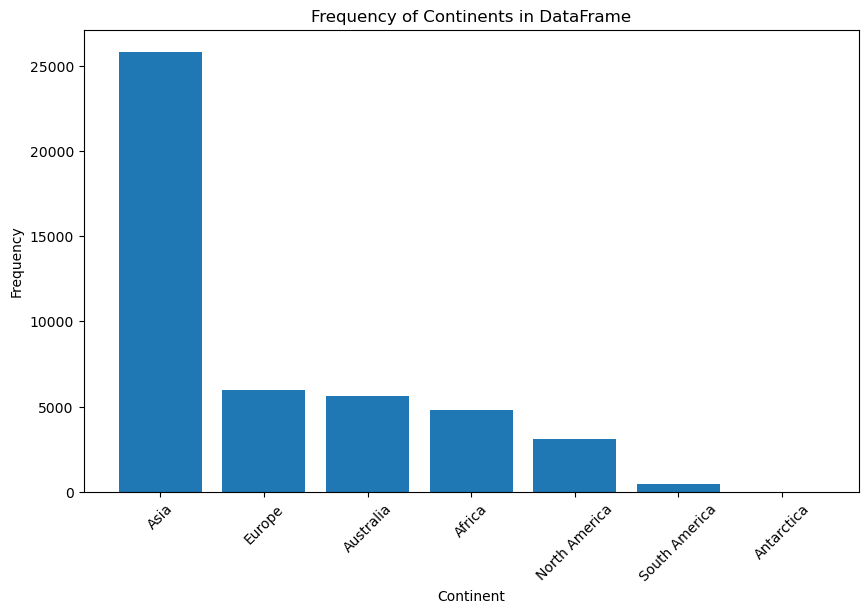

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data representing the countries
countries =d['user_location']


# Filter out the 'Unknown' and missing (None) countries from the data
filtered_countries = [country for country in countries if country not in ('Unknown', None)]

# Replace country names with continents where possible
continents = [country_to_continent.get(country, country) for country in filtered_countries]

# Get the frequency counts of continents
continent_frequency_counts = pd.Series(continents).value_counts()

# Plot the frequency counts of continents
plt.figure(figsize=(10, 6))
plt.bar(continent_frequency_counts.index, continent_frequency_counts.values)
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Frequency of Continents in DataFrame')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


In [39]:
continent_frequency_counts

Asia             25831
Europe            5988
Australia         5622
Africa            4815
North America     3095
South America      457
Antarctica           6
dtype: int64

In [40]:
import matplotlib.pyplot as plt

def plot_countries_count(categorized_locations):
    # Filter countries in Asia
    asia_countries = [country for location, country in categorized_locations.items() if country in ['China', 'India', 'Indonesia', 'Pakistan', 'Bangladesh', 'Japan', 'Philippines', 'Vietnam', 'Turkey', 'Iran', 'Thailand', 'Myanmar', 'South Korea', 'Iraq', 'Afghanistan', 'Saudi Arabia', 'Uzbekistan', 'Malaysia', 'Yemen', 'Nepal', 'North Korea', 'Sri Lanka', 'Kazakhstan', 'Syria', 'Cambodia', 'Jordan', 'Azerbaijan', 'United Arab Emirates', 'Tajikistan', 'Israel', 'Laos', 'Lebanon', 'Kyrgyzstan', 'Turkmenistan', 'Singapore', 'State of Palestine', 'Oman', 'Kuwait', 'Georgia', 'Mongolia', 'Armenia', 'Qatar', 'Bahrain', 'Timor-Leste', 'Cyprus', 'Bhutan', 'Maldives']]
    
    # Count the occurrences of each country in Asia
    country_counts = {country: asia_countries.count(country) for country in set(asia_countries)}
    
    # Plot the count of countries within Asia
    plt.figure(figsize=(10, 6))
    plt.bar(country_counts.keys(), country_counts.values())
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.title('Count of Countries within Asia')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



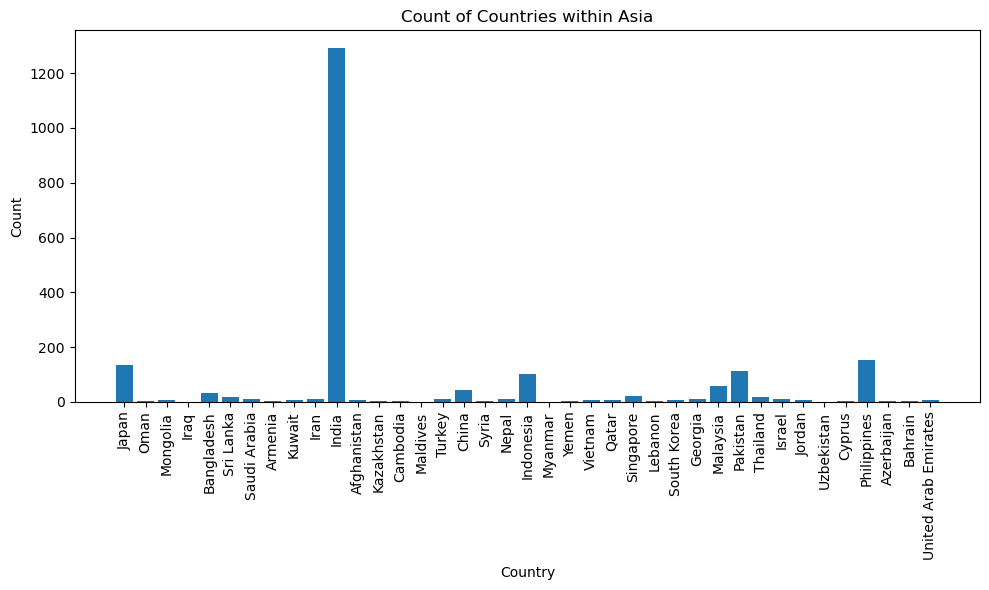

In [41]:
plot_countries_count(categorized_locations)